In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
df = pd.read_csv("titanic_all_numeric.csv")
predictors = df.drop(["survived"], axis=1).values
n_cols = predictors.shape[1]
input_shape = (n_cols,)
target = to_categorical(df.survived)

In [4]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [5]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epochs=10, batch_size=32)



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 177us/step - loss: 1.0605
Epoch 2/10
891/891 [==============================] - 0s 36us/step - loss: 1.0516
Epoch 3/10
891/891 [==============================] - 0s 37us/step - loss: 1.0431
Epoch 4/10
891/891 [==============================] - 0s 37us/step - loss: 1.0345
Epoch 5/10
891/891 [==============================] - 0s 36us/step - loss: 1.0262
Epoch 6/10
891/891 [==============================] - 0s 37us/step - loss: 1.0180
Epoch 7/10
891/891 [==============================] - 0s 37us/step - loss: 1.0098
Epoch 8/10
891/891 [==============================] - 0s 35us/step - loss: 1.0019
Epoch 9/10
891/891 [==============================] - 0s 39us/step - loss: 0.9940
Epoch 10/10
891/891 [==============================] - 0s 38us/step - loss: 0.9863


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s 186us/step - loss: 1.8375
Epo

## Validation

In [6]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 459us/step - loss: 1.0109 - acc: 0.5875 - val_loss: 0.8008 - val_acc: 0.6493
Epoch 2/30
623/623 [==============================] - 0s 50us/step - loss: 0.6745 - acc: 0.6581 - val_loss: 0.5515 - val_acc: 0.7425
Epoch 3/30
623/623 [==============================] - 0s 53us/step - loss: 0.6276 - acc: 0.6758 - val_loss: 0.5388 - val_acc: 0.7201
Epoch 4/30
623/623 [==============================] - 0s 59us/step - loss: 0.6400 - acc: 0.6902 - val_loss: 0.5456 - val_acc: 0.6866
Epoch 5/30
623/623 [==============================] - 0s 59us/step - loss: 0.6386 - acc: 0.6613 - val_loss: 0.4963 - val_acc: 0.7575
Epoch 6/30
623/623 [==============================] - 0s 53us/step - loss: 0.6028 - acc: 0.6934 - val_loss: 0.6669 - val_acc: 0.6567
Epoch 7/30
623/623 [==============================] - 0s 56us/step - loss: 0.6286 - acc: 0.6790 - val_loss: 0.5063 - val_acc: 0.7537


In [7]:
# Specify the model
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


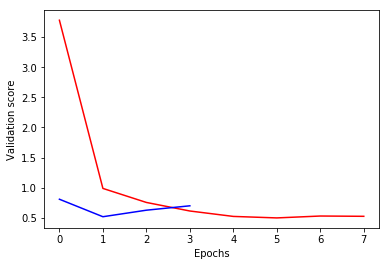

In [8]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape = input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


In [9]:
# Specify the model
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


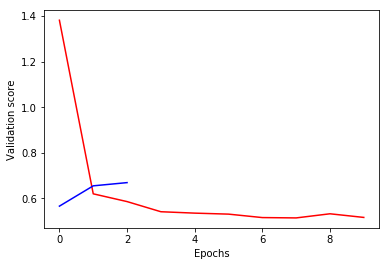

In [10]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, batch_size=32, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, batch_size=32, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

<class 'numpy.ndarray'>


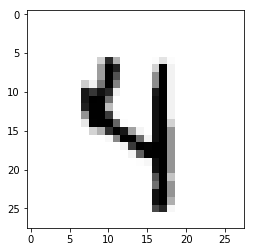

In [11]:
# Assign filename to variable: file
file = 'mnist.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[1, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

In [12]:
digits.shape

(2001, 785)

In [13]:
X = digits[:, 1:]
X.shape

(2001, 784)

In [14]:
y = to_categorical(digits[:, 0])
y.shape

(2001, 10)

In [32]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape = (784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=30, batch_size=64, validation_split=0.15)


Train on 1700 samples, validate on 301 samples
Epoch 1/30
1700/1700 [==============================] - 1s 571us/step - loss: 12.2283 - acc: 0.2182 - val_loss: 11.5206 - val_acc: 0.2658
Epoch 2/30
1700/1700 [==============================] - 0s 55us/step - loss: 10.2741 - acc: 0.3529 - val_loss: 10.9234 - val_acc: 0.3123
Epoch 3/30
1700/1700 [==============================] - 0s 55us/step - loss: 9.8791 - acc: 0.3818 - val_loss: 10.6029 - val_acc: 0.3289
Epoch 4/30
1700/1700 [==============================] - 0s 50us/step - loss: 8.6037 - acc: 0.4488 - val_loss: 8.6033 - val_acc: 0.4319
Epoch 5/30
1700/1700 [==============================] - 0s 52us/step - loss: 6.8058 - acc: 0.5594 - val_loss: 8.0671 - val_acc: 0.4751
Epoch 6/30
1700/1700 [==============================] - 0s 51us/step - loss: 6.2806 - acc: 0.5953 - val_loss: 7.2847 - val_acc: 0.5249
Epoch 7/30
1700/1700 [==============================] - 0s 50us/step - loss: 5.3668 - acc: 0.6471 - val_loss: 6.7824 - val_acc: 0.5648
Ep